### Various tests using various inbalanced-learn models

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from preprocessing import preprocess
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
train_file = "data/FRISS_ClaimHistory_training.csv"
test_file = "data/FRISS_ClaimHistory_test.csv"
fraud_file = "data/fraud_cases.csv"

train, test = preprocess(train_file, test_file, fraud_file)

Finished preprocessing.
Dropped 182 Train entries.
Dropped 43 Test entries.
Preprocessing took 1.71 seconds


In [31]:
drop_cols = ["sys_fraud", "sys_claimid", 'claim_amount_claimed_total']

X_train = train.drop(columns=drop_cols)
y_train = train["sys_fraud"]

X_test = test.drop(columns=drop_cols)
y_test = test["sys_fraud"]

In [32]:
def print_metrics(y, preds):
  print("- Accuracy: {0:.4f}".format(accuracy_score(preds, y)))
  print("- Balanced Accuracy: {0:.4f}".format(balanced_accuracy_score(y, preds)))
  print("- Precision: {0:.4f}".format(precision_score(preds, y)))
  print("- Recall: {0:.4f}".format(recall_score(preds, y)))
  print("- F1: {0:.4f}".format(f1_score(preds, y)))
  cm = confusion_matrix(y, preds)
  cmd_obj = ConfusionMatrixDisplay(cm) 
  cmd_obj.plot()

### Classifier including inner balancing samplers

- Accuracy: 0.9932
- Balanced Accuracy: 0.5000
- Precision: 0.0000
- Recall: 0.0000
- F1: 0.0000


/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


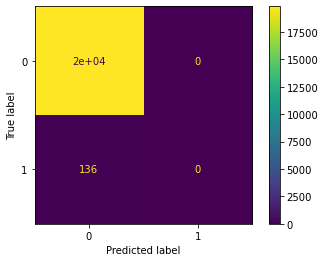

In [33]:
# Bagging Classifier
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       random_state=0)
bc.fit(X_train, y_train) 

y_pred = bc.predict(X_test)
print_metrics(y_test, y_pred)


- Accuracy: 0.8501
- Balanced Accuracy: 0.5229
- Precision: 0.1912
- Recall: 0.0089
- F1: 0.0171


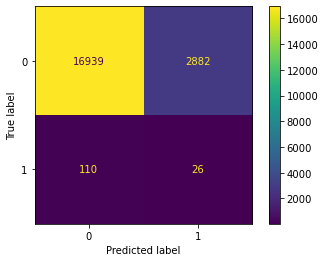

In [34]:
# Balanced Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train) 

y_pred = bbc.predict(X_test)
print_metrics(y_test, y_pred) 

- Accuracy: 0.6233
- Balanced Accuracy: 0.5986
- Precision: 0.5735
- Recall: 0.0103
- F1: 0.0203


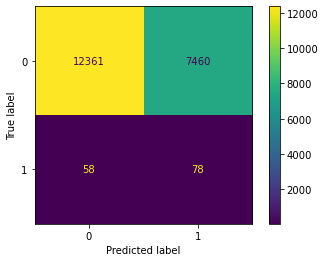

In [43]:
# Balanced RF Classifier

from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, criterion="entropy", random_state=10)
brf.fit(X_train, y_train) 

y_pred = brf.predict(X_test)

print_metrics(y_test, y_pred)  

/home/orlando/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RUSBoostClassifier was fitted with feature names
  warnings.warn(


- Accuracy: 0.8283
- Balanced Accuracy: 0.5302
- Precision: 0.2279
- Recall: 0.0092
- F1: 0.0178


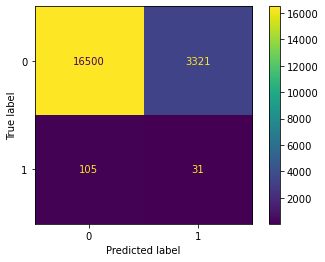

In [36]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)  

y_pred = rusboost.predict(X_test)
print_metrics(y_test, y_pred)  

- Accuracy: 0.7273
- Balanced Accuracy: 0.5743
- Precision: 0.4191
- Recall: 0.0105
- F1: 0.0205


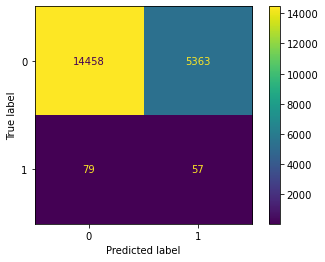

In [37]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train) 

y_pred = eec.predict(X_test)
print_metrics(y_test, y_pred)  

(array([7.3407e+04, 3.6670e+03, 1.2960e+03, 5.3300e+02, 2.6900e+02,
        1.8200e+02, 1.1000e+02, 7.4000e+01, 6.6000e+01, 3.1000e+01,
        5.1000e+01, 1.6000e+01, 1.8000e+01, 7.0000e+00, 1.1000e+01,
        9.0000e+00, 2.0000e+00, 1.2000e+01, 4.0000e+00, 4.0000e+00,
        7.0000e+00, 5.0000e+00, 0.0000e+00, 3.0000e+00, 1.3000e+01,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

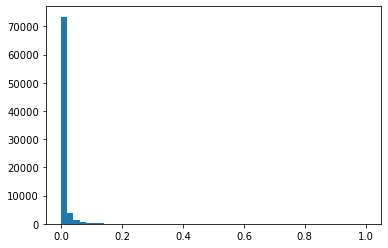

In [46]:
import matplotlib.pyplot as plt
plt.hist(train["claim_amount_claimed_total"], bins = 50)